<a href="https://colab.research.google.com/github/Sebx2projet/Projet_MI/blob/master/Copie_de_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM3 - MI2
# Projet

[![Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jbcaillau/mi2/master?urlpath=lab/tree/proj/proj.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jbcaillau/mi2/blob/master/proj/proj.ipynb)

## Exercice 1B
Soit $f : \mathbf{R}^n \to \mathbf{R}$ définie par $f(x)=(\|x\|^2+1) \sin(\|x\|^2)$.

### 1.1
Montrer que $f$ est deux fois dérivable puis donner son gradient et son hessien.

Soit $g(x) = ||x||^2+1=(x|x)+1$ et $k(x)=sin(||x||^2)=sin((x|x))$

On a, $f=g*k$

Les fonctions $x \to g(x)$ et $x \to k(x)$ sont toutes les deux dérivables. Donc f est dérivable comme produit de fonctions dérivables.

*Gradient :*

$f'(x).h=(g'*k+g*k')(x).h$

$g'(x)=2x^t$ et $k'(x)=2x^t*cos(||x||^2)$ 

$\Rightarrow f'(x).h=[2x^t*sin(||x||^2)+(||x||^2+1)*2x^t*cos(||x||^2)].h$

$=2x^t*h*sin(||x||^2)+2x^t*h*cos(||x||^2)*||x||^2+2x^t*h*cos(||x||^2)$

$=(2x|h)*sin(||x||^2)+(2x|h)*cos(||x||^2)*||x||^2+(2x|h)*cos(||x||^2)$

$=(2x|h)*[sin(||x||^2)+cos(||x||^2)+cos(||x||^2)*||x||^2]$

$$\Rightarrow ∇f(x)=2x[sin(||x||^2)+cos(||x||^2)(1+||x||^2)]$$


*Hessien :*

$∇^2f(x)=2[sin(||x||^2)+cos(||x||^2)(1+||x||^2)]+2x[sin(||x||^2)+cos(||x||^2)(1+||x||^2)]'$

$\rightarrow$ Calculons $[sin(||x||^2)+cos(||x||^2)(1+||x||^2)]'$

$=2x^t*cos(||x||^2)-2x^t*sin(||x||^2)(1+||x||^2)+2x^t*cos(||x||^2)$

$=4x^t*cos(||x||^2)-2x^t*sin(||x||^2)*(1+||x||^2)$

$$\Rightarrow ∇^2f(x)=2[sin(||x||^2)+cos(||x||^2)(1+||x||^2)]+8xx^t*cos(||x||)^2-4xx^tsin(||x||^2)(1+||x||^2)$$

   



### 1.2
Vérifier vos calculs par différences finies pour $n=3$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import copy as copy
import math

plt.ion()
def f(x):
  return ((np.linalg.norm(x)**2)+1)*(np.sin(np.linalg.norm(x)**2))

def gradient(x):
  return 2*x*(np.sin(np.linalg.norm(x)**2)+np.cos(np.linalg.norm(x)**2)*((np.linalg.norm(x)**2)+1))

def hessien(x):
  return 2*(np.sin(np.linalg.norm(x)**2)+np.cos(np.linalg.norm(x)**2)*((np.linalg.norm(x)**2)+1))+8*np.dot(x,np.transpose(x))*np.cos(np.linalg.norm(x)**2)-4*np.dot(x,np.transpose(x))*np.sin(np.linalg.norm(x)**2)*((np.linalg.norm(x)**2)+1)

def dd1(g,x,h):
  n=np.size(x)
  df=np.zeros((n,1))
  for i in range(n):
    e=np.zeros((n,1))
    e[i]=1
    df[i]=(g(x+h*e)-g(x))/h
  return df

def dd2(g,x,h):
  n=np.size(x)
  ddf=np.zeros((n,n))
  for i in range(n):
    e=np.zeros((n,1))
    e[i]=1
    for j in range(n):
      b=np.zeros((n,1))
      b[j]=1
      ddf[j,i]=(g(x+h*b+h*e)+g(x)-g(x+h*e)-g(x+h*b))/h**2
  return ddf

x=np.array([[1],[3],[5]])
h=0.00001
print(x)
print("Gradient de f(x) obtenue par différences finies")
g1=dd1(f,x,h)
print(g1)
print("Gradient der f(x) obtenue par calcul direct")
g2=gradient(x)
print(g2)
print("Différence entre les deux méthodes")
print(g1-g2)
print("Hessien de f(x) obtenu par calcul direct")
h1=hessien(x)
print(h1)
print("Hessien de f(x) obtenu par différences finies d'ordre 2")
h2=dd2(f,x,h)
print(h2)
print("Différence entre les deux méthodes")
print(h1-h2)

[[1]
 [3]
 [5]]
Gradient de f(x) obtenue par différences finies
[[ -65.92226157]
 [-197.76449253]
 [-329.60454591]]
Gradient der f(x) obtenue par calcul direct
[[ -65.92220411]
 [-197.76661232]
 [-329.61102053]]
Différence entre les deux méthodes
[[-5.74632485e-05]
 [ 2.11979163e-03]
 [ 6.47461557e-03]]
Hessien de f(x) obtenu par calcul direct
[[ -11.49343734   97.36409619  206.22162973]
 [  97.36409619  423.93669679  750.5092974 ]
 [ 206.22162973  750.5092974  1294.79696506]]
Hessien de f(x) obtenu par différences finies d'ordre 2
[[ -11.48794837  163.30830022  272.17900822]
 [ 163.30830022  424.01815392  816.59131013]
 [ 272.17900822  816.59131013 1295.13740177]]
Différence entre les deux méthodes
[[-5.48896851e-03 -6.59442040e+01 -6.59573785e+01]
 [-6.59442040e+01 -8.14571268e-02 -6.60820127e+01]
 [-6.59573785e+01 -6.60820127e+01 -3.40436707e-01]]


## Exercice 2
On considère l'ensemble $E$ des fonctions bornées de $[0,1]$ dans $\mathbf{R}$. On muni cet ensemble de la norme
$$ \|x\|_\infty = \sup_{t \in [0,1]} |x(t)|. $$

### 2.1
Donner un exemple de fonction dans $E$ telle que, pour tout $t \in [0,1]$, $|x(t)| < \|x\|_\infty$.

### 2.2
Montrer que $(E,\|\cdot\|_\infty)$ est un espace de Banach.

### 2.3
Montrer que l'ensemble $\mathscr{C}^0([0,1],\mathbf{R})$ des fonctions continues de $[0,1]$ dans $\mathbf{R}$ est un sous-espace vectoriel fermé de $E$.

## Exercice 3A

### 3.1
Résoudre le problème d'optimisation
$$ \int_0^1 |t-\sum_{k=0}^n a_k e^{kt}|^2\,\mathrm{d}t \to \min $$
$$ (a_0,\dots,a_n) \in \mathbf{R}^{n+1} $$
pour $n=1$ et $n=2$.

Nous cherchons à minimiser $$ \|t-\sum_{k=0}^n a_k e^{kt}\|_{L^2([0,1])} $$
Prenons $n=2$.

Pour se faire, on doit calculer le projeté orthogonal de t sur le s-e-v fermé (de dimension au plus 2) engendré par 1, $e^{t}$ et $e^{2t}$ dans ${L^2([0,1])}$.

Posons $t^*=a_0+a_1e^{t}+a_2e^{2t}$. Nous avons $t-t^* \in A^⊥$, avec $A=Vect(1,e^{t},e^{2t})$.
L'ensemble ${L^2([0,1])}$ est muni du produit scalaire suivant : 
$$(f|g)=\int_0^1 f(t)*g(t)\,\mathrm{d}t$$

Nous devons donc résoudre le système suivant :

$$ \left\{ \begin{array}{l}
  (t-t^*|1)=0\\
  (t-t^*|e^{t})=0\\
  (t-t^*|e^{2t})=0
\end{array} \right. $$
<=>
$$ \left\{ \begin{array}{l}
  (t|1)-a_0-a_1(e^{t}|1)-a_2(e^{2t}|1)=0\\
  (t|e^{t})-a_0(1|e^{t})-a_1(e^{t}|(e^{t})-a_2(e^{2t}|(e^{t})=0\\
  (t|e^{2t})-a_0(1|e^{2t})-a_1(e^{t}|e^{2t})-a_2(e^{2t}|e^{2t})=0
\end{array} \right. $$

Nous avons les résultats suivants :

$(t|e^{kt})=\int_0^1 te^{kt}\,\mathrm{d}t=[\frac{t}{k}e^{kt}]_{0}^{1}-\int_0^1 \frac{1}{k}e^{kt}\,\mathrm{d}t=\frac{e^{k}}{k}-[\frac{1}{k^2}e^{kt}]_{0}^{1}=\frac{ke^{k}-e^{k}+1}{k^2}$ , pour $k \geq 1$

$(e^{mt}|e^{nt})=\int_0^1 e^{mt}e^{nt}\,\mathrm{d}t=\int_0^1 e^{(m+n)t}\,\mathrm{d}t=\frac{e^{(m+n)}-1}{m+n}$ , pour $m+n \geq 1$

<=>
$$ \left\{ \begin{array}{l}
  \frac{1}{2}-a_0-a_1(e-1)-a_2\frac{e^{2}-1}{2}=0\\
  1-a_0(e-1)-a_1\frac{e^{2}-1}{2}-a_2\frac{e^{3}-1}{3}=0\\
  \frac{e^{2}+1}{4}-a_0\frac{e^{2}-1}{2}-a_1\frac{e^{3}-1}{3}-a_2\frac{e^{4}-1}{4}=0
\end{array} \right. $$

<=>
$$ \left\{ \begin{array}{l}
  a_0+a_1(e-1)+a_2\frac{e^{2}-1}{2}=\frac{1}{2}\\
  a_0(e-1)+a_1\frac{e^{2}-1}{2}+a_2\frac{e^{3}-1}{3}=1\\
  a_0\frac{e^{2}-1}{2}+a_1\frac{e^{3}-1}{3}+a_2\frac{e^{4}-1}{4}=\frac{e^{2}+1}{4}
\end{array} \right. $$

Nous identifions la matrice de Gram :

$$ G = \left[ \begin{array}{cc} 1 & e-1 & \frac{e^{2}-1}{2}\\ e-1 & \frac{e^{2}-1}{2} & \frac{e^{3}-1}{3}\\ \frac{e^{2}-1}{2} & \frac{e^{3}-1}{3} & \frac{e^{4}-1}{4} \end{array} \right] $$

Nous aboutissons donc au système linéaire suivant :

$$ \left[ \begin{array}{cc} 1 & e-1 & \frac{e^{2}-1}{2}\\ e-1 & \frac{e^{2}-1}{2} & \frac{e^{3}-1}{3}\\ \frac{e^{2}-1}{2} & \frac{e^{3}-1}{3} & \frac{e^{4}-1}{4} \end{array} \right]
   \left[ \begin{array}{c} a_0\\ a_1\\ a_2 \end{array} \right] = 
   \left[ \begin{array}{c} 1/2\\ 1\\ \frac{e^{2}+1}{4}  \end{array} \right] $$

Ce système est de Cramer, car par le calcul, on trouve que $det(G) > 0$. $G$ est donc inversible et la solution du système est unique. On en déduit cette solution :

$a_0=-1 , a_1=\frac{6}{e^{3}-3e^{2}+3e-1} , a_2=\frac{3e-9}{e^{3}-3e^{2}+3e-1}  $

La résolution pour $n=1$ est similaire :

On doit calculer le projeté orthogonal de t sur le s-e-v fermé engendré par 1 et $e^{t}$ dans ${L^2([0,1])}$.

Posons $t^*=a_0+a_1e^{t}$. Nous avons $t-t^* \in A^⊥$, avec $A=Vect(1,e^{t})$.

Nous devons donc résoudre le système suivant :

$$ \left\{ \begin{array}{l}
  (t-t^*|1)=0\\
  (t-t^*|e^{t})=0
\end{array} \right. $$
<=>
$$ \left\{ \begin{array}{l}
  (t|1)-a_0-a_1(e^{t}|1)=0\\
  (t|e^{t})-a_0(1|e^{t})-a_1(e^{t}|e^{t})=0
\end{array} \right. $$

<=>
$$ \left\{ \begin{array}{l}
  a_0+a_1(e-1)=\frac{1}{2}\\
  a_0(e-1)+a_1\frac{e^{2}-1}{2}=1
\end{array} \right. $$

Nous identifions la matrice de Gram :

$$ G = \left[ \begin{array}{cc} 1 & e-1 \\ e-1 & \frac{e^{2}-1}{2}\end{array} \right] $$

Nous aboutissons donc au système linéaire suivant :

$$ \left[ \begin{array}{cc} 1 & e-1 \\ e-1 & \frac{e^{2}-1}{2} \end{array} \right]
   \left[ \begin{array}{c} a_0\\ a_1 \end{array} \right] = 
   \left[ \begin{array}{c} 1/2\\ 1  \end{array} \right] $$

Ce système est de Cramer, car par le calcul, on trouve que $det(G) > 0$. $G$ est donc inversible et la solution du système est unique. On en déduit cette solution :

$a_0=\frac{-1}{2} , a_1=\frac{1}{e-1} $


### 3.2
Représenter graphiquement les approximations de la fonction $t \to t$, $t \in [0,1]$, ainsi obtenues.

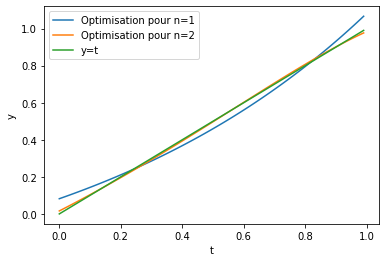

In [0]:
# à compléter...
import math
import numpy as np
import matplotlib.pyplot as plt

def exo3A(N):
    M1=np.zeros((N,1))
    M2=np.zeros((N,1))
    temps=np.zeros((N,1))
    t=0

    for i in range(0,N):
        M1[i,0]=-1/2+1/(math.exp(1)-1)*math.exp(t)
        M2[i,0]=-1+6/(math.exp(3)-3*math.exp(2)+3*math.exp(1)-1)*math.exp(t)+(3*math.exp(1)-9)/(math.exp(3)-3*math.exp(2)+3*math.exp(1)-1)*math.exp(2*t)
        temps[i,0]=t
        t=t+1/N

    return (temps,M1,M2)

(temps,N1,N2)=exo3A(100)
plt.plot(temps,N1,label='Optimisation pour n=1')
plt.plot(temps,N2,label='Optimisation pour n=2')
plt.plot(temps,temps,label='y=t')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

## Exercice 4A
Soit $f \in \mathbf{R}^\mathbf{R}$ définie par $f(t)=|t|$ sur $[-\pi,\pi[$ et prolongée par $2\pi$-périodicité.

### 4.1
Donner l'expression de la série de Fourier de $f$
sur la base hilbertienne des polynômes trigonométriques.

$\forall t \in [-\pi,\pi[$, la fonction $f(t)=|t|$ est paire.

$$\Rightarrow b_{n} = 0$$

Calcul de $a_{0}$ : 

$a_{0} = (f | \frac{1}{\sqrt(2\pi)}) = \frac{1}{\sqrt(2\pi)} * (f | 1)$

$=\frac{1}{\sqrt(2\pi)} * \int_0^{2\pi} |t| \mathrm{d}t = \frac{1}{\sqrt(2\pi)} * \int_{-\pi}^{\pi} t \mathrm{d}t$

$\Rightarrow a_{0} = [\int_{-\pi}^{0} -t \mathrm{d}t + \int_{0}^{\pi} t \mathrm{d}t] * \frac{1}{\sqrt(2\pi)}$

$= \frac{1}{\sqrt(2\pi)} * (\frac{\pi^2}{2} + \frac{\pi^2}{2})$

$a_{0} = \frac{\pi^2}{\sqrt(2\pi)} $

Calcul de $a_{n}$ :

$a_{n} = (f | \frac{cos(nt)}{\sqrt(\pi)})$
$ = \frac{2}{\sqrt(\pi)} * \int_{0}^{\pi} t*cos(nt) \mathrm{d}t $ 

$\rightarrow IPP$

$a_{n} = \frac{2}{\sqrt(\pi)}*[\frac{t}{n}*sin(nt)]_{0}^{\pi} - \frac{2}{n\sqrt(\pi)} * \int_{0}^{\pi} sin(nt) \mathrm{d}t$

$= \frac{-2}{n\sqrt(\pi)}*[\frac{-1}{n}*cos(nt)]_{0}^{\pi}$ 
$= \frac{2}{n^2\sqrt(\pi)}*(cos(n\pi)-1)$

$a_{n} = \frac{2}{n^2\sqrt(\pi)}*((-1)^n-1)$

Finalement, 
$ a_{n} = \frac{-4}{n^2\sqrt(\pi)}$ si $n=2p+1$ et $a_{n} = 0$ si $n=2p$.

Donc, $$f(t) = \frac{\pi}{2}+\sum_{p \geq 0}\frac{-4cos(nt)}{\pi(2p+1)^2}$$


### 4.2
En déduire
$$ \sum_{p \geq 0} \frac{1}{(2p+1)^4}\cdot $$

On a : 

$||f||_{2}^{2} = 2*\int_{0}^{\pi} t^2 \mathrm{d}t = \frac{2\pi^3}{3}$

D'un autre côté, en utilisant Parseval : 

$||f||_{2}^{2} = \frac{\pi^3}{2} + \sum_{p \geq 0}\frac{16}{\pi(2p+1)^4}$

$\Rightarrow \frac{\pi^3}{2} + \frac{16}{\pi} \sum_{p \geq 0}\frac{1}{(2p+1)^4} = \frac{2\pi^3}{3}$

$\Rightarrow  \sum_{p \geq 0}\frac{1}{(2p+1)^4} = (\frac{2\pi^3}{3}-\frac{\pi^3}{2})*\frac{\pi}{16}$

$$\Rightarrow  \sum_{p \geq 0}\frac{1}{(2p+1)^4} = \frac{\pi^4}{96}$$


### 4.3
Peut-on utiliser le théorème de Dirichlet pour déduire l'expression d'une autre série ?

$f$ est $C^1$ par morceaux donc nous pouvons utiliser le théorème de Dirichlet. 

En $t=0$, on trouve que :

$\frac{\pi}{2}+\sum_{p \geq 0}\frac{-4}{\pi}*\frac{1}{(2p+1)^4} = 0$     
$(\frac{f(t_{+})+f(t_{-})}{2} = 0)$

$\Rightarrow \sum_{p \geq 0}\frac{-4}{\pi}*\frac{1}{(2p+1)^4}=\frac{-\pi}{2}$

$$\Rightarrow \sum_{p \geq 0}\frac{1}{(2p+1)^4}=\frac{\pi^2}{8}$$



### 4.4
Vérifier numériquement la convergence de la série de la question 4.2.

In [0]:
# à compléter...
import math
import numpy as np
import matplotlib.pyplot as plt

def exo4A(Nmax,eps):

    S=np.zeros((Nmax,1))
    k=1
    erreur=1
    S[0,0]=1

    while(erreur>eps and k<Nmax):
        S[k,0]=S[k-1,0]+1/(2*k+1)**4
        erreur=S[k,0]-S[k-1,0]
        k=k+1

    print('Valeur de la somme de la série :', S[k-1,0])
    print('Valeur trouvée au 4.2 : ',math.pi**4/96)

exo4A(100,1e-7)

Valeur de la somme de la série : 1.0146771779012873
Valeur trouvée au 4.2 :  1.014678031604192


## Exercice 5B
On cherche les distributions $S$ dans $\mathscr{D}'(\mathbf{R})$ qui vérifient
$$ xS' = T_{1} \tag{1} $$
où $T_{1}$ désigne la distribution régulière associée à la fonction constante égale à $1$.

### 5.1
Montrer que $S$ est solution de (1) si et seulement si
$$ x(S-T_{\ln|x|})'=0. $$

S solution de (1). Pour tout $x$ non nul:

<=> $xS'-T_{1}=0$ <=> $x(S'-\frac{1}{x}T_{1})=0$ 
<=> $x(S'-T_{\ln|x|}')=0$ <=> $x(S-T_{\ln|x|})'=0$

Précision : $\frac{1}{x}T_{1} : \varphi \in \mathscr{D}(\mathbf{R}) \to <T_{1},\frac{1}{x}\varphi>=\int_\mathbf{R} 1*\frac{1}{x}\varphi(x)\,\mathrm{d}x=\int_\mathbf{R} \frac{1}{x}\varphi(x)\,\mathrm{d}x=T_{\frac{1}{x}}=T_{\ln|x|}'$

### 5.2
En déduire que $S$ est solution de (1) si et seulement s'il existe une constante $c \in \mathbf{R}$ telle que
$$ (S-T_{\ln|x|}-cT_H)'=0 $$
où $H$ est la fonction de Heaviside.

On a $x(S-T_{\ln|x|})'=0$ $=>$ D'après la proposition "Division", il existe $c \in \mathbf{R}$ telle que, $(S-T_{ln|x|})'=c\delta$ avec $\delta=(T_{H})'$
$=>$ $(S-T_{ln|x|})'=c(T_{H})'$ $=> (S-T_{ln|x|}-cT_{H})'=0$

### 5.3
En déduire finalement l'ensemble des solutions de (1).

Les solutions sont les distributions : $ S=T_{ln|x|}+cT_{H}+d$  avec $c,d \in \mathbf{R}$

### 5.4
Quelle est la solution maximale (de classe $\mathscr{C}^1$) de l'équation différentielle ordinaire
$$ y'(x)=1/x, \quad y(1)=0\ ? $$

$y(x)=\ln|x|+A$ avec $A \in \mathbf{R}$
or $y(1)=0 => \ln|1|+A=0 => A=0 => y(x)=\ln|x|$

## Exercice 6A
On considère le problème aux limites suivant : trouver $u \in \mathscr{C}^2([0,1])$ telle que
$$ -u''(x)+u(x) = f(x),\quad x \in ]0,1[, $$
$$ u(0)=0,\quad u'(1)=0, \tag{1}$$
où $f \in \mathscr{C}([0,1])$ est une fonction fixée.
                                        
## 6.1
Proposer une formulation variationnelle de ce problème, puis le résoudre.

La 1ère étape de la démarche variationelle est de montrer que toute solution forte $u$ est solution faible de notre problème :
Soit $u \in \mathscr{C}^2([0,1])$ une solution de notre problème $(1)$. On va tester notre solution $u$ à l'aide de classe de fonctions de ${H^1(]0,1[)}$, en incluant les conditions de Dirichlet.

${H^1(]0,1[)}$ est un espace de Hilbert, ${H^1(]0,1[)}$ = $[{v \in {L^2(]0,1[)}} |v' \in {L^2(]0,1[)}]$

${H^1(]0,1[)}$ est munit du produit scalaire $(u|v)_{L^2}=(u|v)_{L^2}+(u'|v')_{L^2}$

Nous prenons $u, v \in {H^1([0,1])}$, leur produit $uv \in {H^1([0,1])}.$
$u$ est solution de notre problème. $v \in {H^1([0,1])}$ et $u$ est solution de $(1)$. Testons en intégrant le produit de $(1)$ par $v:$

$$\int_0^1 (-u''+u)v\,\mathrm{d}x=\int_0^1 fv\,\mathrm{d}x$$
Après IPP, on a : 
$$[-u'v]_{0}^{1}+\int_0^1 u'+v'\,\mathrm{d}x+\int_0^1 u+v\,\mathrm{d}x=\int_0^1 fv\,\mathrm{d}x$$
<=>
$$-u'(1)v(1)+u'(0)v(0)+\int_0^1 (u'+v'+u+v)\,\mathrm{d}x=\int_0^1 fv\,\mathrm{d}x$$
Par les conditions de Dirichlet, on a $v(0)=0$ et $v(1)=0$, donc :
$$\int_0^1 (u'+v'+u+v)\,\mathrm{d}x=\int_0^1 fv\,\mathrm{d}x$$
<=>
$$(u|v)_{H^1}=\int_0^1 fv\,\mathrm{d}x \tag{2}$$

Le produit scalaire de u par v aboutit à une forme linéaire continue, on en conclut que toute solution de $(1)$, dites "solution forte", est aussi solution de $(2)$, dite "solution faible".

Nous devons maintenant prouver que la solution faible de $(2)$ est unique.

$\varphi:v \to \int_0^1 fv\,\mathrm{d}x$

$(∀ v \in {H^1(]0,1[)}),$
$$|\varphi(v)|=|\int_0^1 fv\,\mathrm{d}x|$$
$$=|(f|v)_{L^2}|$$
$$\leq \|f\|_{L^2}\|v\|_{L^2}$$
$$\leq \|f\|_{L^2}\|v\|_{H^1}$$

<=> $(∀ v \in {H^1(]0,1[)})=(u|v)_{H^1}=<\varphi,v>$

Grâce à ce résultat, on peut utiliser le théorème de Riesz, qui dit qu'il existe une unique solution faible vérifiant $(2)$.

En montrant la régularité de notre solution faible, nous montrerons que cette solution $u \in \mathscr{C}^2([0,1])$.

$(∀ v \in {D(]0,1[)} ⊂ {H^1(]0,1[)}),$

$(u|v)_{H^1}=(u|v)_{L^2}+(u'|v')_{L^2}=\int_0^1 fv_, \mathrm{d}x$

$==> <u',v'>+<u,v>=<f,v>$

Au sens des distributions, $<T_{u'},v>+<T_{u},v>=<T_{f},v>$

On a : 

$-<u'',v>+<u,v>=<f,v>$

$-u''+u=f$ dans ${D'(]0,1[)}$ 

$u''=u-f \in {D(]0,1[)} ⊂ {C^0(]0,1[)}$

On a donc que $u \in {C^2(]0,1[)}.$

Pour finir, montrons que toute solution faible est solution forte:

On a $u\in {H^1(]0,1[)}$, $f \in {C^0(]0,1[)}$ et $v \in {D(]0,1[)}$ . D'après ce qu'on a vu :

$[-u'v]_{0}^{1}+\int_0^1 (-u''+u-f)v\,\mathrm{d}x=0$

<==> $-u''+u-f = 0$ puisque $u'(1)v(1)-u'(0)v(0)=0$

Ce qui implique que $-u''(x)+u(x)=f(x), x \in ]0,1[$, car $u \in {C^2(]0,1[)}.$

Nous pouvons maintenant enfin déterminer les conditions aux limites.

On a $u \in {H^1(]0,1[)}$, avec les conditions de Dirichlet, on peut donc définir $u(0)=0.$

De plus $(∀ v \in {H^1(]0,1[)}, u'(1)v(1)-u'(0)v(0)=0$

Prenons $v(x)=x$, on a $v(1)=1$, $v(0)=0$

<==> $u'(1)*1=0$ <==> $u'(1)=0.$

On retrouve donc nos conditions aux limites initiales $u(0)=0, u'(1)=0.$




## 6.2
Pour $u : [0,1] \to \mathbf{R}$ suffisamment régulière, justifier l'approximation
$$ u''(x_i) \simeq \frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{h^2},\quad i=1,\dots,N-1, $$
où $x_i=i\cdot h$ avec $i=0,...,N$, et $h=1/N$ ($N$ étant un nombre de pas discrétisation fixé).
En déduire un schéma de résolution numérique du problème précédent que l'on testera pour $f(x)=\sin(4x)$.

Nous allons faire 2 développements de Taylor, autour de $x_{i+1}$ et $x_{i-1}:$

$u(x_{i+1})=u(x_i)+hu'(x_i)+\frac{h^2}{2}u''(x_i)+\frac{h^3}{6}u^{(3)}(β_1), β_1 \in ]x_i,x_{i+1}[$

$u(x_{i-1})=u(x_i)-hu'(x_i)+\frac{h^2}{2}u''(x_i)-\frac{h^3}{6}u^{(3)}(β_2), β_2 \in ]x_{i-1},x_i[$

Calculons $u(x_{i+1})+u(x_{i-1}):$

$$u(x_{i+1})+u(x_{i-1})=2u(x_i)+h^2u''(x_i)+\frac{h^3}{6}(u^{(3)}(β_1)+u^{(3)}(β_2))$$

<==> $$\frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{h^2}=u''(x_i)+\frac{h}{6}(u^{(3)}(β_1)+u^{(3)}(β_2))$$

$u^{(3)}(β_1)+u^{(3)}(β_2) \to 0$, donc on a finalement :

$$ u''(x_i) \simeq \frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{h^2} $$

Maintenant pour déduire un shéma de résolution numérique de notre problème, nous allons construire chaque point de la courbe d'$u$ de manière récurrente grâce à l'approximation trouvée. On a : 

$$u(x_{i+1})=(2+h^2)u(x_i)-u(x_{i-1})-h^2f(x_i)$$

Nous aurons $u(0)=0$ et $u(1)=0.$



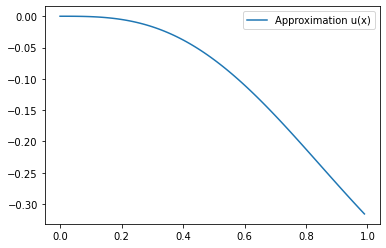

In [0]:
# à compléter...
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    y=math.sin(4*x)
    return y

def exo6A(N):
    D=np.zeros((N,1))
    temps=[0]
    h=1/N
    k=1
    while(k<N-1):
        D[k+1,0]=(2+h**2)*D[k,0]-D[k-1,0]-h**2*f(h*k)
        temps=temps+[temps[-1] + h]
        k=k+1
    temps=temps+[temps[-1] + h]

    return(temps,D)

(temps,D)=exo6A(100)
plt.plot(temps,D,label="Approximation u(x)")
plt.legend()
plt.show()